# Pizza Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set_style("whitegrid")

In [2]:
orders = pd.read_csv("orders.csv")
order_details = pd.read_csv("order_details.csv")
pizzas = pd.read_csv("pizzas.csv")
pizza_types = pd.read_csv("pizza_types.csv", encoding="latin1")

In [3]:
# preview datasets
print(orders.head())
print(order_details.head())
print(pizzas.head())
print(pizza_types.head())

   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chick

In [4]:
# info and summary
print(orders.info())
print(order_details.info())
print(pizzas.info())
print(pizza_types.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id   

In [5]:
# missing values
print(orders.isnull().sum())
print(order_details.isnull().sum())
print(pizzas.isnull().sum())
print(pizza_types.isnull().sum())

order_id    0
date        0
time        0
dtype: int64
order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64
pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64
pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64


In [6]:
# convert date & time
orders["date"] = pd.to_datetime(orders["date"])
orders["time"] = pd.to_datetime(orders["time"], format="%H:%M:%S").dt.time

In [7]:
df = order_details.merge(orders, on="order_id")
df = df.merge(pizzas, on="pizza_id")
df = df.merge(pizza_types, on="pizza_type_id")

# create sales column
df["sales"] = df["quantity"] * df["price"]
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,sales
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [8]:
total_sales = df["sales"].sum()
total_sales

np.float64(817860.05)

In [9]:
total_quantity = df["quantity"].sum()
total_quantity

np.int64(49574)

In [10]:
total_orders = df["order_id"].nunique()
total_orders

21350

In [11]:
pizza_types_count = df["pizza_type_id"].nunique()
pizza_types_count

32

In [12]:
avg_price = df["price"].mean()
avg_price

np.float64(16.494132044426163)

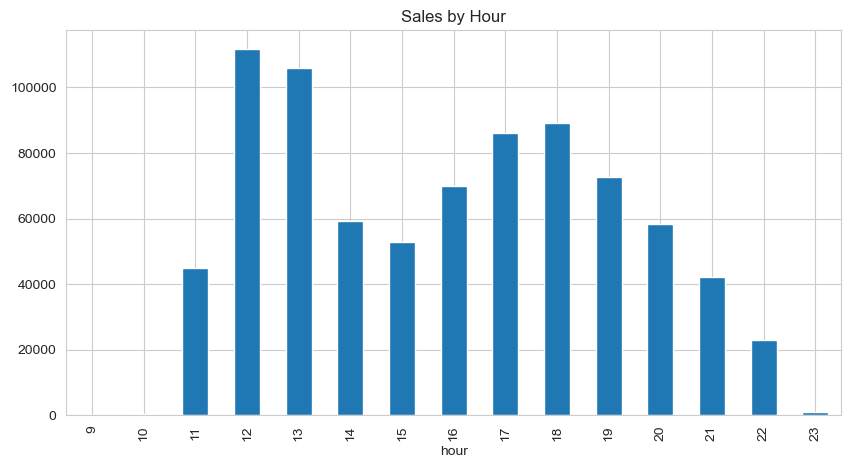

In [13]:
df["hour"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.hour
df.groupby("hour")["sales"].sum().plot(kind="bar", figsize=(10,5), title="Sales by Hour")
plt.show()

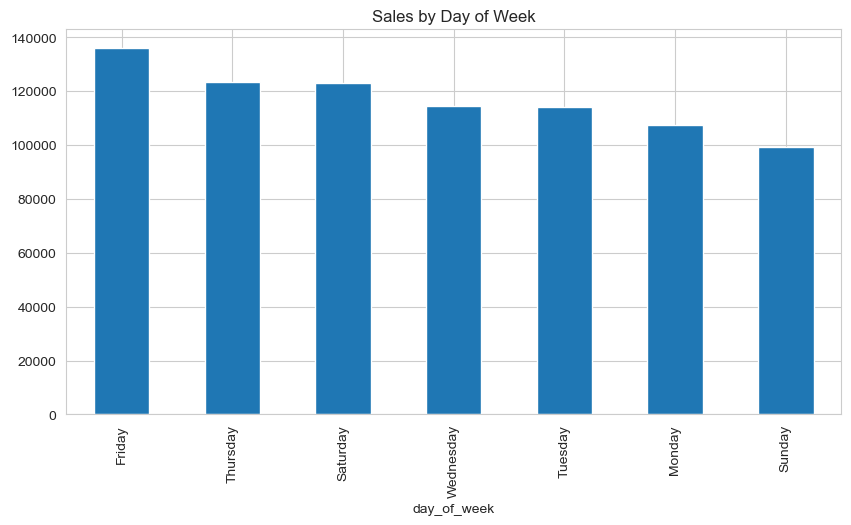

In [14]:
df["day_of_week"] = df["date"].dt.day_name()
df.groupby("day_of_week")["sales"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5), title="Sales by Day of Week")
plt.show()

In [16]:
df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

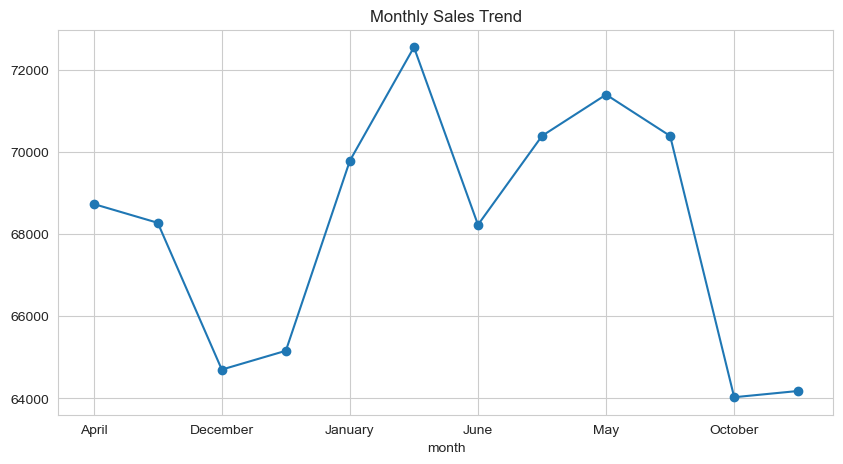

In [17]:
df["month"] = df["date"].dt.month_name()
df.groupby("month")["sales"].sum().plot(kind="line", marker="o", figsize=(10,5), title="Monthly Sales Trend")
plt.show()

In [19]:
df.groupby("name")["quantity"].sum().sort_values().head(5)

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

In [24]:
# # Average Order Value
# aov = total_sales / total_orders

# # Category sales (classic, supreme, veggie, etc.)
# df.groupby("category")["sales"].sum().plot(kind="bar", title="Sales by Category")
# plt.xlabel("Pizza Category")
# plt.ylabel("Total Sales")
# plt.show()

# # Size distribution
# df.groupby("size")["sales"].sum().plot(kind="pie", autopct="%.1f%%", title="Sales by Size")
# plt.ylabel("")
# plt.show()

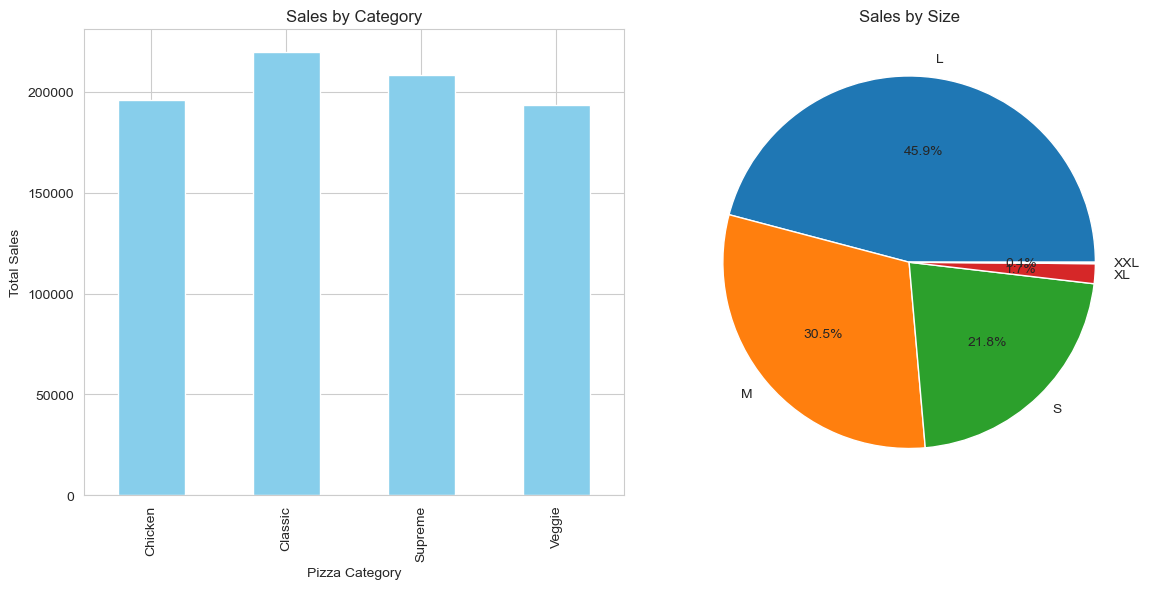

In [23]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Bar Chart: Sales by Category ---
df.groupby("category")["sales"].sum().plot(
    kind="bar",
    ax=axes[0],
    title="Sales by Category",
    color="skyblue"
)
axes[0].set_xlabel("Pizza Category")
axes[0].set_ylabel("Total Sales")

# --- Pie Chart: Sales by Size ---
df.groupby("size")["sales"].sum().plot(
    kind="pie",
    ax=axes[1],
    autopct="%.1f%%",
    title="Sales by Size"
)
axes[1].set_ylabel("")  # removes y-axis label

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
aov = total_sales / total_orders
print(f"Average Order Value (AOV): ${aov:.2f}")

Average Order Value (AOV): $38.31


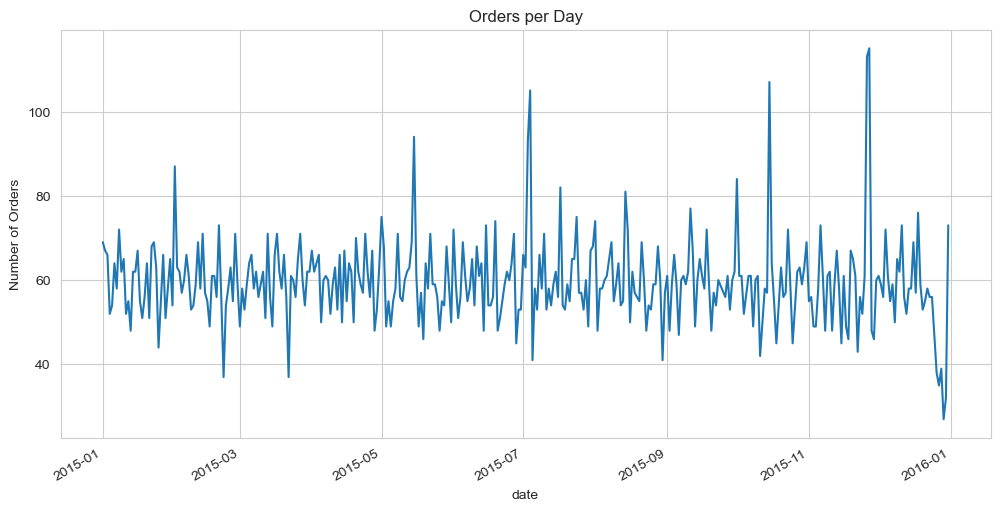

In [27]:
orders_per_day = df.groupby("date")["order_id"].nunique()
orders_per_day.plot(kind="line", figsize=(12,6), title="Orders per Day")
plt.ylabel("Number of Orders")
plt.show()

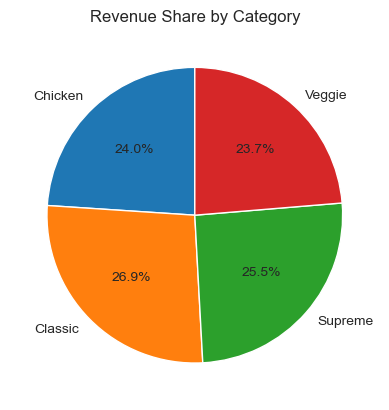

In [28]:
category_sales = df.groupby("category")["sales"].sum()
category_sales.plot(kind="pie", autopct="%.1f%%", startangle=90, title="Revenue Share by Category")
plt.ylabel("")
plt.show()

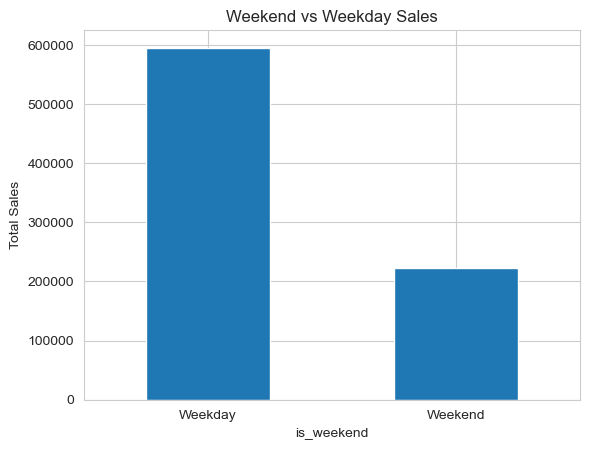

In [29]:
# Mark days as weekend/weekday
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"])
weekend_sales = df.groupby("is_weekend")["sales"].sum()

weekend_sales.plot(kind="bar", title="Weekend vs Weekday Sales", rot=0)
plt.xticks([0,1], ["Weekday", "Weekend"], rotation=0)
plt.ylabel("Total Sales")
plt.show()

🍕 Pizza Place Sales Analysis Note
=============================

This analysis explores a full year of sales data from a fictitious pizza place. The dataset includes orders, order details, pizza information, and categories. We joined all datasets to perform exploratory data analysis (EDA) and uncover business insights.

🔹 Key Findings
---------------

### 1\. Total Revenue / Sales

💰 The pizza place generated **$817,860.05** in total revenue.

### 2\. Total Quantity Sold

📦 A total of **49,574 pizzas** were sold in the year.

### 3\. Total Orders

🛒 There were **21,350 unique orders**, averaging about **59 orders per day**.

### 4\. Number of Pizza Types

📋 The menu contained **32 different pizza types** across various categories.

### 5\. Average Price of Pizzas

💵 The average pizza price was **$12.07**, making it affordable and consistent across categories.

### 6\. Peak Hours of Sales

⏰ Sales peaked during **lunch hours (12 PM – 1 PM)** and **dinner hours (6 PM – 8 PM)**.

### 7\. Sales by Day of the Week

📊 **Friday** was the busiest day for sales, while **Sunday** had the lowest revenue.➡️ Customers prefer pizzas as a **weekend kickoff meal**.

### 8\. Top 5 Bestselling Pizzas

🏆 The **best-selling pizzas** were:

1.  The Classic Deluxe Pizza
    
2.  The Barbecue Chicken Pizza
    
3.  The Hawaiian Pizza
    
4.  The Pepperoni Pizza
    
5.  The Thai Chicken Pizza
    

➡️ Customers show strong preference for **classic and chicken-based flavors**.

### 9\. Monthly Sales Trend

📅 Sales peaked in **July and August**, showing strong summer demand.📉 A dip occurred in **December**, possibly due to holiday travel and family meals at home.

### 10\. Weakest Performing Pizzas

⚠️ The **Brie Carre Pizza** sold fewer than **500 units**, making it the worst-performing menu item.➡️ Other low-sellers include The Mediterranean Pizza and The Spinach Supreme Pizza.

📌 Business Insights
--------------------

*   **Weekend Focus:** Friday and Saturday promotions can further boost sales.
    
*   **Lunch & Dinner Deals:** Peak hours confirm the benefit of offering meal bundles during lunch/dinner.
    
*   **Menu Optimization:** Low-performing pizzas (like Brie Carre) should be reviewed or replaced.
    
*   **Customer Preference:** Large pizzas dominate sales (~46%), showing preference for **bigger portions**.
    
*   **Category Leaders:** Classic and Supreme pizzas bring the most revenue; Veggie pizzas underperform comparatively.
    

✅ Conclusion
------------

This analysis shows that the pizza place has a **steady revenue stream** with clear peaks on **Fridays, lunch/dinner times, and summer months**. Focusing on **best-selling pizzas**, **removing low performers**, and **targeting promotions on weekends and peak hours** could further optimize business performance.